# ObsID : 0945020136, SRCNUM : 4, Instru : EMOS1
**Simbad :** Galaxy (2dFGRS TGS322Z047) https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%404738151&Name=2dFGRS%20TGS322Z047&submit=submit

## ESASky

https://sky.esa.int/esasky/?target=52.97008333333333%20-28.304833333333328&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``

- Stack Catalogue name : 4XMMs J033152.7-281818
- IAU name : 4XMM J033152.7-281818
- RA : 03h 31m 52.751s
- DEC : -28° 18' 18.16"

``GAIA``

- Designation : Gaia DR3 5057378691743871360
- RA : 03h 31m 52.742s
- DEC : -28° 18' 18.52"
- Parallax : -0.7065 mas
- Magnitude G (mag) : 19.6328

``GLADE``

- No : 2 124 866
- RA : 03h 31m 52.754s
- DEC : -28° 18' 18.08"
- Distance : 289.8972 Mpc

``2MASS``

- Name : 03315275-2818185
- RA : 03h 31m 52.751s
- DEC : -28° 18' 18.57"

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

### Redshift

In [2]:
def redshift(d_Mpc):
    H0 = 70 # Hubble constant (km/s/Mpc)
    c = 299792.458 # km/s
    return H0*d_Mpc/c

z = redshift(289.8972)
print("Redshift : z =", z)

Redshift : z = 0.06768950805293442


## Fit statistic

In [3]:
Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [26]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp_cstat.fits')[0])

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: ObsID0945020136_SRCNUM4_EMOS1_spectrum_grp_cstat.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.826e-03 +/- 1.295e-03 (64.0 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-76
  Telescope: XMM Instrument: EMOS1  Channel Type: PI
  Exposure Time: 7689 sec
 Using fit statistic: cstat
 Using Background File                ObsID0945020136_SRCNUM4_EMOS1_background_spectrum.fits
  Background Exposure Time: 7686 sec
 Using Response (RMF) File            ObsID0945020136_SRCNUM4_EMOS1.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945020136_SRCNUM4_EMOS1.arf


Fit statistic  : C-Statistic                110.1189     using 76 bins.

Test statistic : Chi-Squared                 58.3622     using 76 bins.
 Null hypothesis probability of 8.9385e-01 with 73 d

In [5]:
n_cts = 6.826e-03*7689

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 52.485113999999996

The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.


## Plot spectrum

In [27]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")
spec.ignore("**-0.2 12.0-**")

***Warning: Fit is not current.
     2 channels (1-2) ignored in spectrum #     1
      No channels ignored (no channels in specified range)

Fit statistic  : C-Statistic                105.7402     using 74 bins.

Test statistic : Chi-Squared                 54.5784     using 74 bins.
 Null hypothesis probability of 9.2567e-01 with 71 degrees of freedom
 Current data and model not fit yet.



(-0.5, 857.5, 659.5, -0.5)

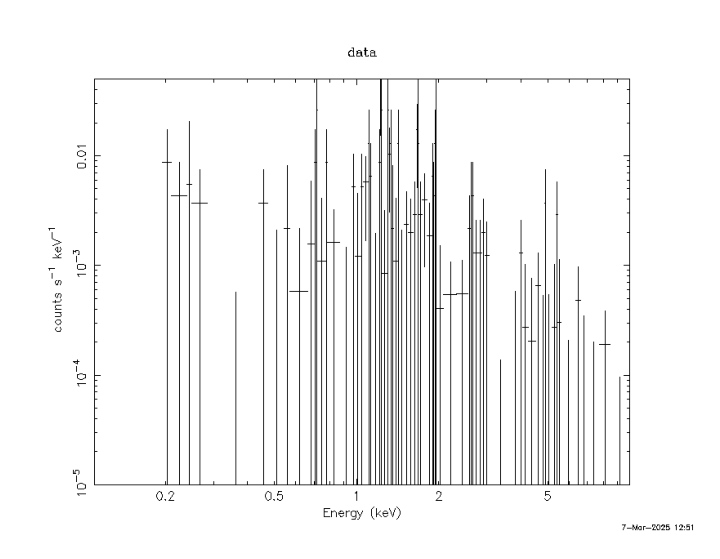

In [28]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum2.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
**tbabs :**

In [34]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              4.421276e+06     using 74 bins.

Test statistic : Chi-Squared              1.597152e+11     using 74 bins.
 Null hypothesis probability of 0.000000e+00 with 71 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
842120       906819       -3      0.337265     0.0896172      0.310419
105.74       5.88272e+06  -4       2091.18       84.6016     0.0934125
105.74       2.88578e-10  -5       999999.       10.3607   5.45996e+11
 

(-0.5, 856.5, 661.5, -0.5)

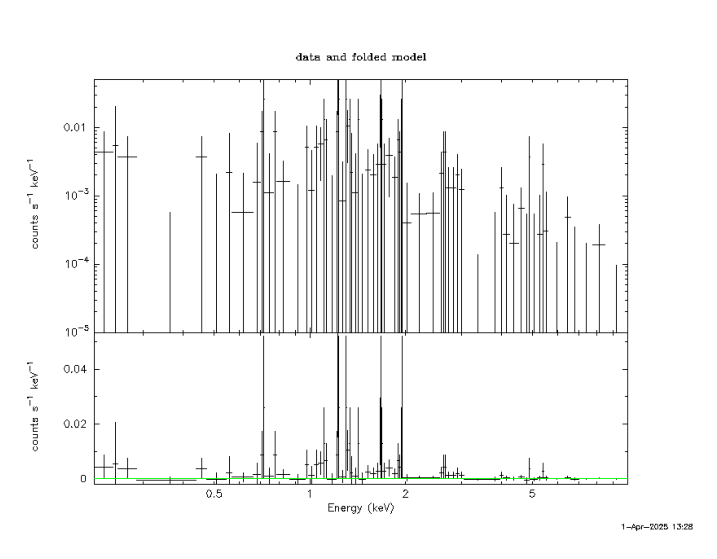

In [35]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody2.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [36]:
AllModels.clear()
moz = Model("ztbabs*bbody")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody_z = moz.zTBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model zTBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bbody      kT         keV      3.00000      +/-  0.0          
   4    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              4.419005e+06     using 74 bins.

Test statistic : Chi-Squared              1.596655e+11     using 74 bins.
 Null hypothesis probability of 0.000000e+00 with 71 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic              4.528321e+06     using 74 bins.

Test statistic : Chi-Squared              1.647777e+11     using 74 bins.
 Null hypothesis probability of 0.000000e+00 with 71 degrees of freedom
 Current data and model not fit yet.
        

(-0.5, 855.5, 656.5, -0.5)

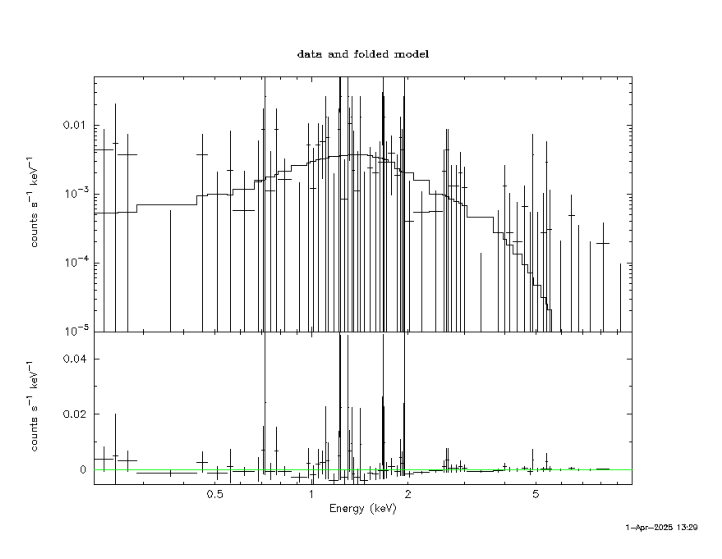

In [37]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody2_z.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model (Second best fit)
**tbabs :**

In [38]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.063694e+06     using 74 bins.

Test statistic : Chi-Squared              7.778195e+09     using 74 bins.
 Null hypothesis probability of 0.000000e+00 with 71 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
174844       198066       -3      0.235352       198.363      0.167930
1655.31      176785       -3     0.0204512       199.294    0.00151852
660.238      215925       -2    0.00792146       199.334   0.000705370


(-0.5, 852.5, 657.5, -0.5)

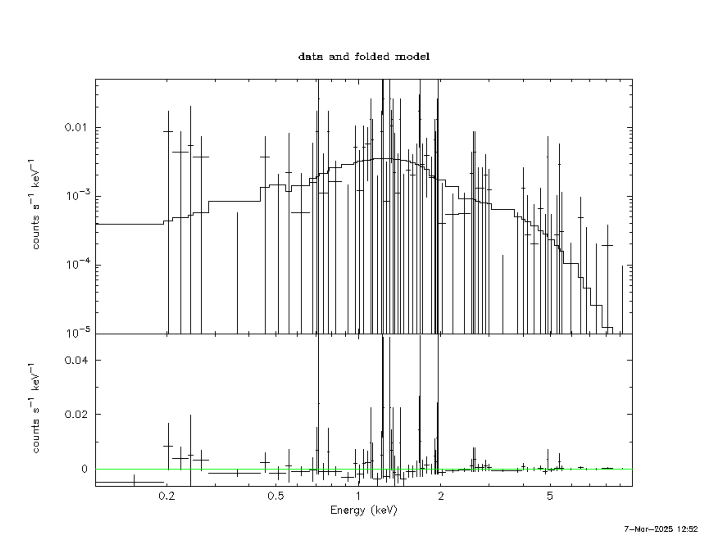

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss2.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [39]:
AllModels.clear()
moz = Model("ztbabs*bremss")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss_z = moz.zTBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model zTBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   bremss     kT         keV      7.00000      +/-  0.0          
   4    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.060581e+06     using 74 bins.

Test statistic : Chi-Squared              7.756084e+09     using 74 bins.
 Null hypothesis probability of 0.000000e+00 with 71 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic              1.147773e+06     using 74 bins.

Test statistic : Chi-Squared              8.712064e+09     using 74 bins.
 Null hypothesis probability of 0.000000e+00 with 71 degrees of freedom
 Current data and model not fit yet.
       

### Apec model (Best fit)
**tbabs :**

In [40]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = moz.zTBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                395935.1     using 74 bins.

Test statistic : Chi-Squared              1.110122e+09     using 74 bins.
 Null hypothesis probability of 0.000000e+00 with 71 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        5:norm
167.2        115197       -3       252.654       36.0626      0.375627
111.338      36.814 

(-0.5, 860.5, 656.5, -0.5)

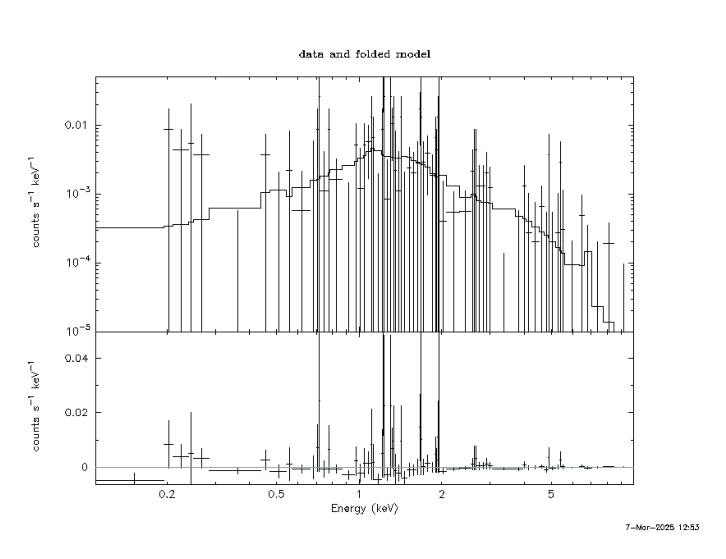

In [15]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec2.png')[0])
plt.imshow(img)
plt.axis('off')

**ztbabs :**

In [41]:
AllModels.clear()
moz = Model("ztbabs*apec")
moz.zTBabs.Redshift = z
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec_z = moz.zTBabs.nH.values[0]


Model zTBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   zTBabs     nH         10^22    1.00000      +/-  0.0          
   2    1   zTBabs     Redshift            0.0          frozen
   3    2   apec       kT         keV      1.00000      +/-  0.0          
   4    2   apec       Abundanc            1.00000      frozen
   5    2   apec       Redshift            0.0          frozen
   6    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                390817.7     using 74 bins.

Test statistic : Chi-Squared              1.077310e+09     using 74 bins.
 Null hypothesis probability of 0.000000e+00 with 71 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                486291.3     using 74 bins.

Test statistic : Chi-Squared              1.793174e+09     using 74 bi

### Powerlaw model
Extremely long calcul time. My computer crashed.

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky

- RA = 52.9697976°
- Dec = -28.3050451°

53.97 -28.31

**Column density :** nH = 3*10^20 cm^-2

In [42]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print(f"(ztbabs) : {nH_bbody_z*10**22}")
print()
print(color.BOLD+"bremss (Second best fit)"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print(f"(ztbabs) : {nH_bremss_z*10**22}")
print()
print(color.BOLD+"apec (Best fit)"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print(f"(ztbabs) : {nH_apec_z*10**22}")

The different models give a column density of :

bbody
(tbabs) : 9.999990097915604e+27
(ztbabs) : 39807.345673249285

bremss (Second best fit)
(tbabs) : 5.315968097415838e+19
(ztbabs) : 1.4808613813659993e+21

apec (Best fit)
(tbabs) : 1.792831233584472e+21
(ztbabs) : 1.9246417585203113e+21


## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Apec`` with C-statistic = 67.1854 using 76 bins: **2.1506e-13 ergs/cm^2/s**.
- X-ray flux of the second best-fitting ztbabs model ``Bremss`` with C-statistic = 67.6551 using 76 bins: **2.1804e-13 ergs/cm^2/s**.

In [2]:
Flux = 2.1506e-13 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Apec : F_x-ray = {Flux} ergs/cm^2/s")

X-ray flux : 
Apec : F_x-ray = 2.1506e-13 ergs/cm^2/s


### Optical flux

In [44]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 19.6328

F = F_optical(G)

print(color.BOLD+"Optical flux : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux : F_optical = 1.4725474536744745e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [45]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END+f"F_x-ray/F_optical = {Flux/F}")

X-ray flux / Optical flux ratio : F_x-ray/F_optical = 1.4604622721213965


## Luminosity

In [4]:
"""GAIA"""

P_mas = 0.7065 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : d = {d_cm} cm")
print(f"Luminosity : L_x-ray = {Luminosity} erg/s")
print()

"""GLADE"""

d_kpc = 289897.2 # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GLADE)"+color.END)
print(f"Distance : d = {d_cm} cm")
print(f"Luminosity : L_x-ray = {Luminosity} erg/s")

(GAIA)
Distance : d = 4.3675866949752303e+21 cm
Luminosity : L_x-ray = 5.155283750301561e+31 erg/s

(GLADE)
Distance : d = 8.945357900400001e+26 cm
Luminosity : L_x-ray = 2.162543976844635e+42 erg/s
